In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [10]:
# Load the Excel file
file_path = "heart_disease.xlsx"
xls = pd.ExcelFile(file_path)

# Load the "Heart_disease" sheet
df = pd.read_excel(xls, sheet_name="Heart_disease")
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [11]:
# Check dataset info
print(" Dataset Info:")
print(df.info())

# Summary statistics
print("\n Summary Statistics:")
print(df.describe())


 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB
None

 Summary Statistics:
              age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  846.000000  908.000000
mean    53.791850  133.430617  201.48458

<ipython-input-12-792d9913dd96>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='num', data=df, palette='Set2')


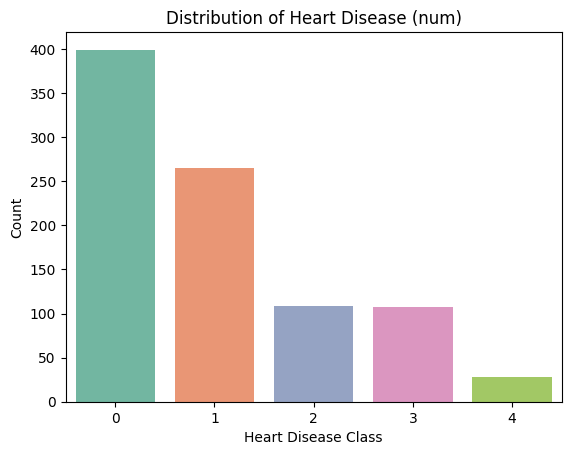

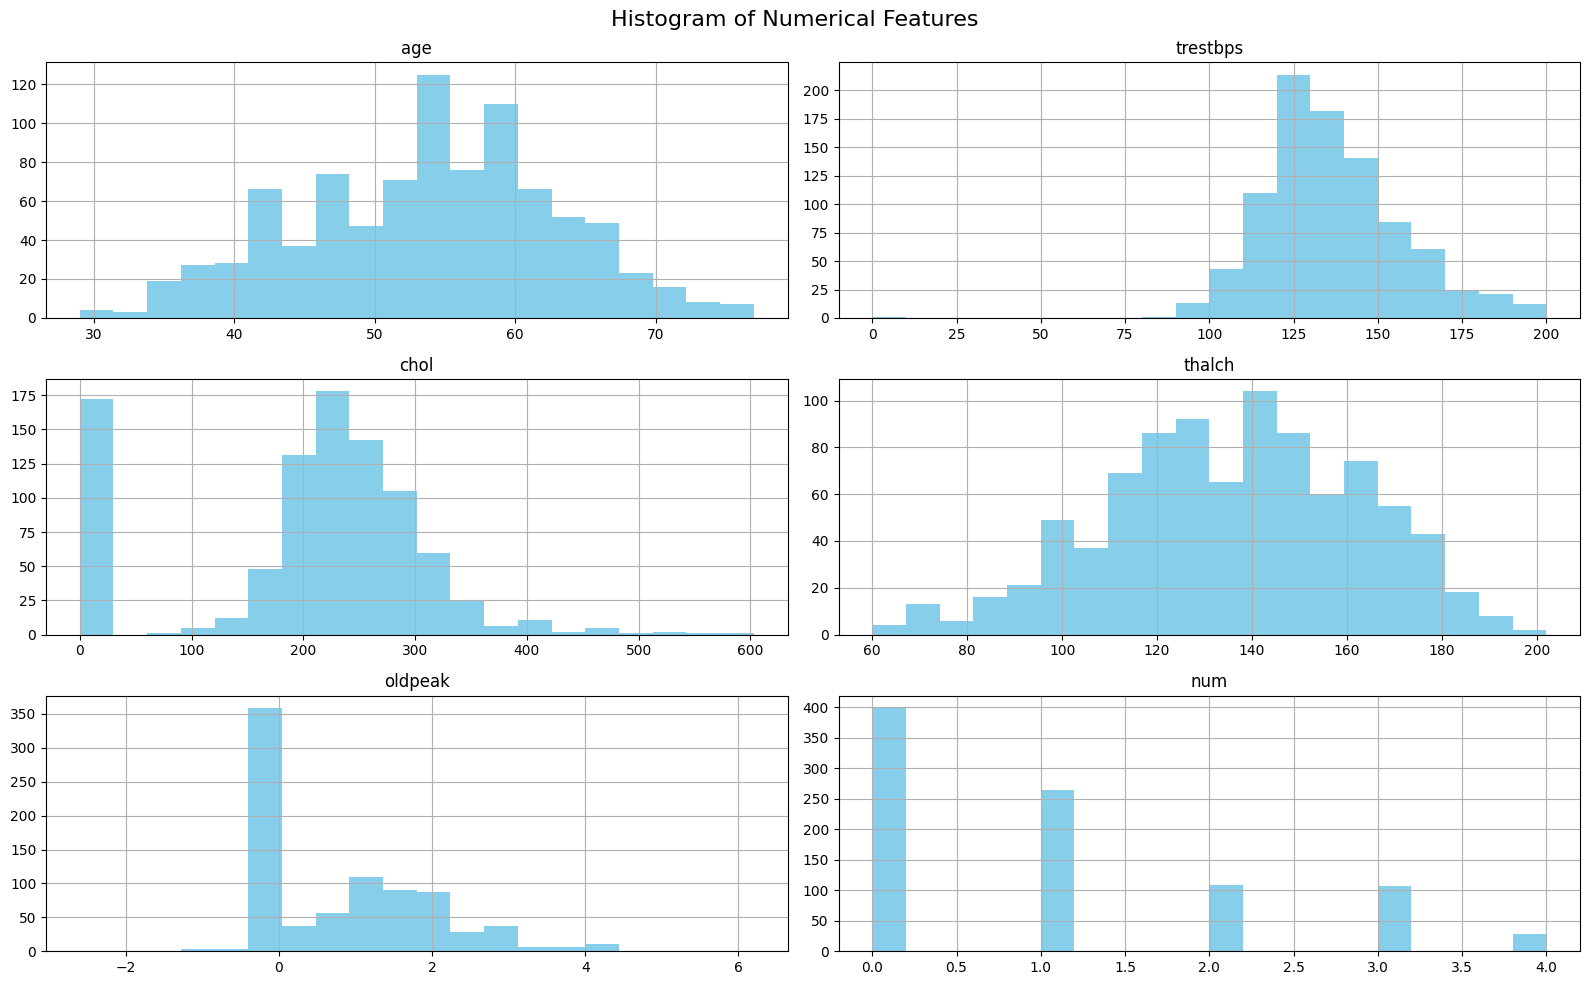

In [12]:
# Distribution of Target Variable
sns.countplot(x='num', data=df, palette='Set2')
plt.title("Distribution of Heart Disease (num)")
plt.xlabel("Heart Disease Class")
plt.ylabel("Count")
plt.show()

# Histograms of numerical features
df.hist(bins=20, figsize=(16, 10), color='skyblue')
plt.suptitle("Histogram of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()


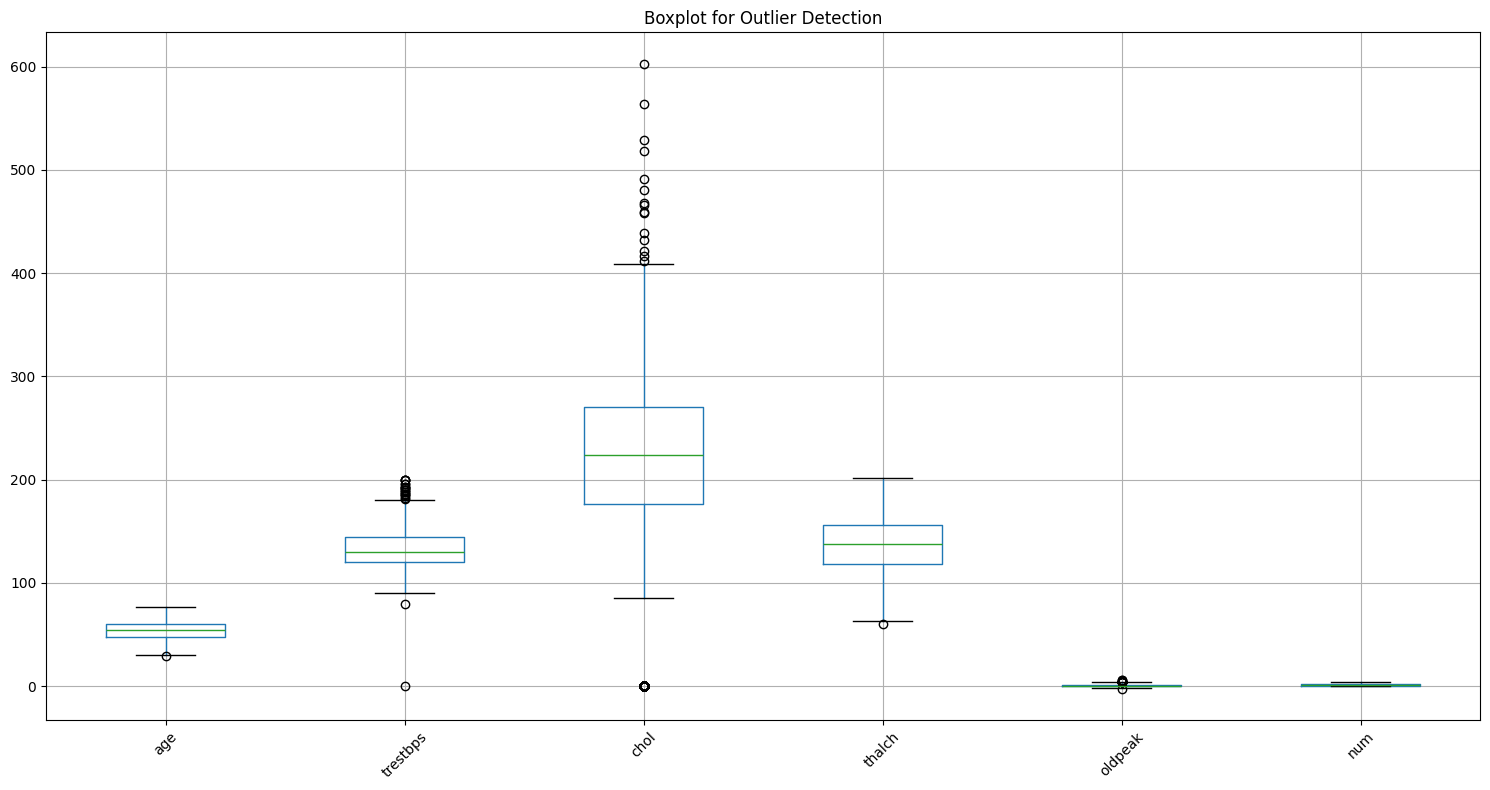

In [13]:
# Boxplots for outlier detection
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15, 8))
df[numeric_cols].boxplot()
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


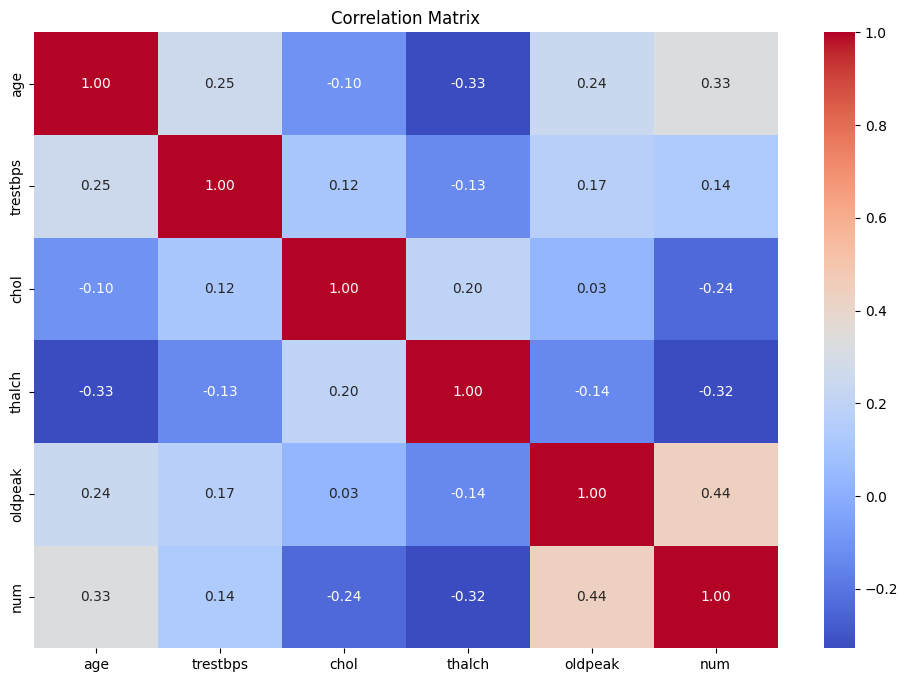

In [14]:
# Compute correlation matrix only on numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [15]:
# Fill missing values in 'oldpeak' with the median
df.loc[:, "oldpeak"] = df["oldpeak"].fillna(df["oldpeak"].median())

# Convert categorical features to string
categorical_cols = ["sex", "cp", "restecg", "exang", "slope", "thal"]
df[categorical_cols] = df[categorical_cols].astype(str)

# Apply Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [16]:
# Features & Target
X = df.drop("num", axis=1)
y = df["num"]

# Normalize numerical features
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [17]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)


In [18]:
# Train Decision Tree
dt_model = DecisionTreeClassifier(
    criterion="entropy", max_depth=6, min_samples_split=5, random_state=42
)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=5,
                       random_state=42)

In [19]:
# Predictions
y_pred = dt_model.predict(X_test)

# Evaluation Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.556390977443609

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.74      0.73        80
           1       0.49      0.42      0.45        79
           2       0.40      0.44      0.42        80
           3       0.44      0.49      0.46        80
           4       0.75      0.70      0.72        80

    accuracy                           0.56       399
   macro avg       0.56      0.56      0.56       399
weighted avg       0.56      0.56      0.56       399


Confusion Matrix:
 [[59  7  2 11  1]
 [14 33 16 14  2]
 [ 6 15 35 20  4]
 [ 1 10 18 39 12]
 [ 1  2 16  5 56]]


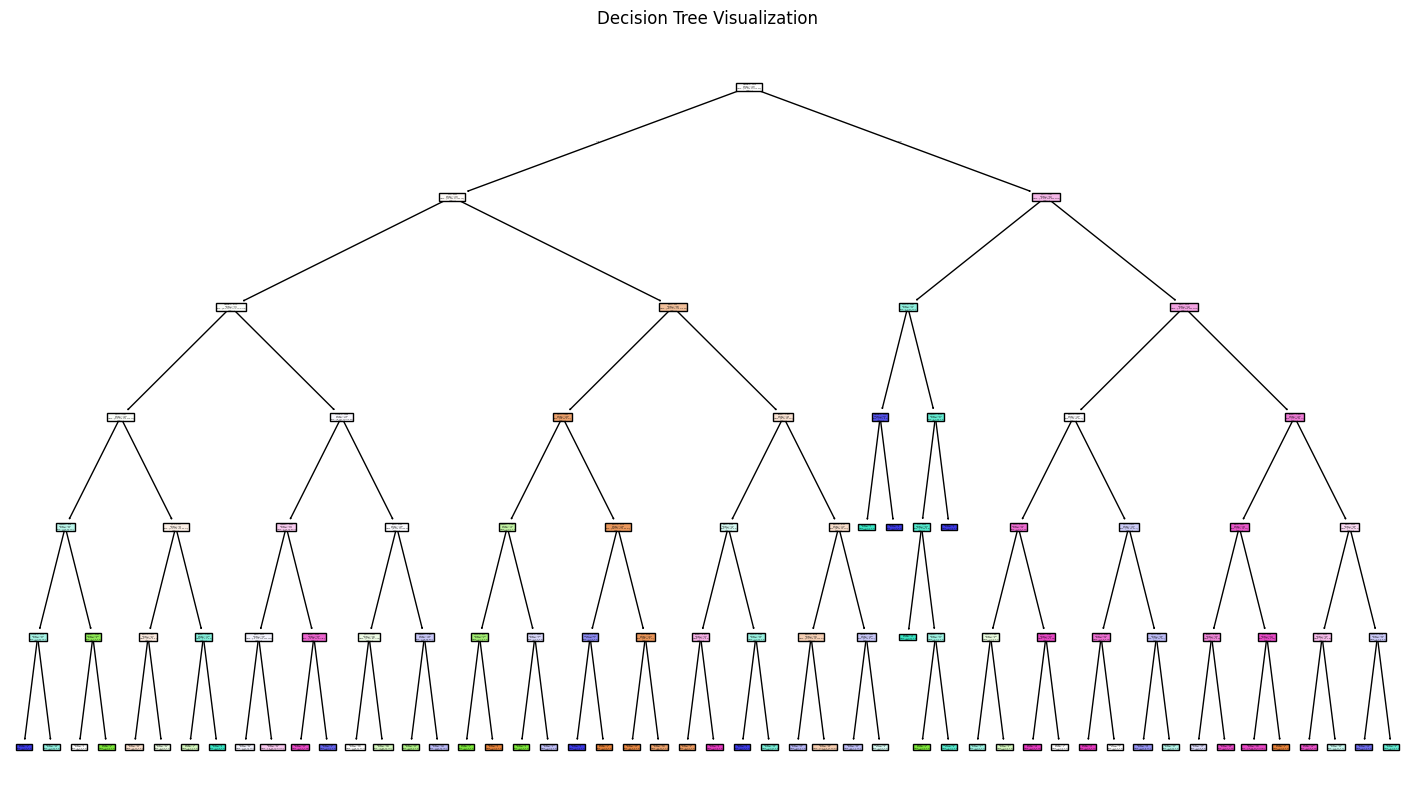

In [20]:
# Decision Tree Plot
plt.figure(figsize=(18, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=[str(i) for i in range(5)], filled=True)
plt.title("Decision Tree Visualization")
plt.show()


In [21]:
print("🔹 Q1. What are some common hyperparameters of decision tree models?\n")
print("- `criterion`: Function to measure the quality of a split ('gini', 'entropy').")
print("- `max_depth`: Maximum depth of the tree (controls overfitting).")
print("- `min_samples_split`: Minimum samples required to split an internal node.")
print("- `min_samples_leaf`: Minimum samples required at a leaf node.")

print("\n🔹 Q2. What is the difference between Label Encoding and One-hot Encoding?\n")
print("- Label Encoding assigns a unique integer to each category. Useful for tree-based models.")
print("- One-hot Encoding creates binary columns for each category. Useful for linear models.")


🔹 Q1. What are some common hyperparameters of decision tree models?

- `criterion`: Function to measure the quality of a split ('gini', 'entropy').
- `max_depth`: Maximum depth of the tree (controls overfitting).
- `min_samples_split`: Minimum samples required to split an internal node.
- `min_samples_leaf`: Minimum samples required at a leaf node.

🔹 Q2. What is the difference between Label Encoding and One-hot Encoding?

- Label Encoding assigns a unique integer to each category. Useful for tree-based models.
- One-hot Encoding creates binary columns for each category. Useful for linear models.
